# User Churn Prediction

In this project,we use supervised learning models to identify whether users will stop the service in the future. And we also contribute to analyze the top factors in user churn.

# Contents
Part 1: Data exploration

Part 2: Feature Preprocessing

Part 3: Model Training and Model Evaluation

Part 4: Feature Importance


## Part 1: Data exploration
### Part 1.1: Understand the Raw dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

df = pd.read_csv('churn.all')
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [2]:
print ("Num of rows: " + str(df.shape[0])) # row count
print ("Num of columns: " + str(df.shape[1])) # column count
df.describe()

Num of rows: 5000
Num of columns: 21


,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [3]:
#missing data
missing_df=df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['filling_factor'] = (df.shape[0] - missing_df['missing_count']) / df.shape[0] * 100
missing_df.sort_values('filling_factor').reset_index(drop = True)

,column_name,missing_count,filling_factor
0,state,0,100.0
1,total_intl_charge,0,100.0
2,total_intl_calls,0,100.0
3,total_intl_minutes,0,100.0
4,total_night_charge,0,100.0
5,total_night_calls,0,100.0
6,total_night_minutes,0,100.0
7,total_eve_charge,0,100.0
8,total_eve_calls,0,100.0
9,number_customer_service_calls,0,100.0


### Part 1.2: Data Cleaning

In [4]:
#Remove Extra Whitespace
df['voice_mail_plan'][0] # check categorical feature

' yes'

In [5]:
# Remove the heading and trailing whitespaces
df['voice_mail_plan'] = df['voice_mail_plan'].map(lambda x: x.strip())
df['intl_plan'] = df['intl_plan'].map(lambda x: x.strip())
df['churned'] = df['churned'].map(lambda x: x.strip())

In [6]:
df['voice_mail_plan'][0] # Check the categorical feature after manipulation

'yes'

### Part 1.3: Understand the Features

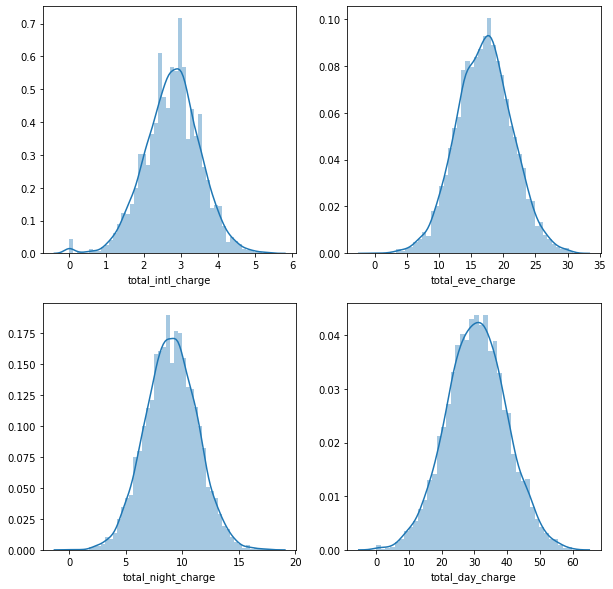

In [7]:
# check the feature distribution
fig=plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['total_intl_charge'],kde=True)
plt.subplot(2,2,2)
sns.distplot(df['total_eve_charge'],kde=True)
plt.subplot(2,2,3)
sns.distplot(df['total_night_charge'],kde=True)
plt.subplot(2,2,4)
sns.distplot(df['total_day_charge'],kde=True)
plt.show()

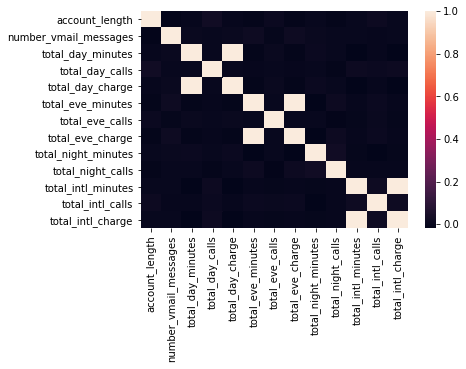

In [8]:
# correlations between all the features
corr = df[["account_length", "number_vmail_messages", "total_day_minutes",
                    "total_day_calls", "total_day_charge", "total_eve_minutes",
                    "total_eve_calls", "total_eve_charge", "total_night_minutes",
                    "total_night_calls", "total_intl_minutes", "total_intl_calls",
                    "total_intl_charge"]].corr()

# show heapmap of correlations
sns.heatmap(corr)

From the heatmap above, we can see that 'total_day_charge' and 'total_day_minutes', 'total_eve_charge' and 'total_eve_minutes', 'total_intl_charge' and 'total_intl_minutes' are highly correlated. 

## Part 2: Feature Preprocessing

In [9]:
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [10]:
# df['day_per_minute_charge']=df['total_day_charge']/df['total_day_minutes']
# df.head(50)

After calculating the per minute charge for day, night and international separately,
we find the per minute charge does not change for day, night and international seperately. Thus, we decide to delete three features, 'total_day_minutes', 'total_eve_minutes','total_intl_minutes'.
Meanwhile, 'area_code','phone_number','churned' will also be dropped.

In [11]:
# drop columns
df_new=df.drop(['area_code','phone_number','churned','total_day_minutes', 'total_eve_minutes','total_intl_minutes'],axis=1)

In [12]:
# check null values
df_new.isnull().sum()

state                            0
account_length                   0
intl_plan                        0
voice_mail_plan                  0
number_vmail_messages            0
total_day_calls                  0
total_day_charge                 0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [13]:
# count duplicated rows
df_new.duplicated(keep='first').sum()

0

In [14]:
print(df_new['intl_plan'].unique())
print(df_new['voice_mail_plan'].unique())

['no' 'yes']
['yes' 'no']


In [15]:
# yes and no have to be converted to boolean values
yes_no_col = ["intl_plan","voice_mail_plan"]
df_new[yes_no_col] = df_new[yes_no_col] == 'yes'

In [16]:
#Transfer categorical feature into numerical feature
df_new= pd.get_dummies(df_new, columns=['state'])
df_new.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,False,True,25,110,45.07,99,16.78,244.7,91,11.01,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107,False,True,26,123,27.47,103,16.62,254.4,103,11.45,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137,False,False,0,114,41.38,110,10.30,162.6,104,7.32,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84,True,False,0,71,50.90,88,5.26,196.9,89,8.86,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,75,True,False,0,113,28.34,122,12.61,186.9,121,8.41,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# check label 
print(df['churned'].unique())

['False.' 'True.']


In [18]:
# convert to boolean values
y = np.where(df['churned'] == 'True.',1,0)

In [19]:
df_new[:]

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,False,True,25,110,45.07,99,16.78,244.7,91,11.01,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107,False,True,26,123,27.47,103,16.62,254.4,103,11.45,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137,False,False,0,114,41.38,110,10.30,162.6,104,7.32,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84,True,False,0,71,50.90,88,5.26,196.9,89,8.86,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,75,True,False,0,113,28.34,122,12.61,186.9,121,8.41,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,False,True,40,127,40.07,126,18.96,297.5,116,13.39,5,2.67,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4996,152,False,False,0,90,31.31,73,21.83,213.6,113,9.61,2,3.97,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4997,61,False,False,0,89,23.90,128,14.69,212.4,97,9.56,4,3.67,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4998,109,False,False,0,67,32.10,92,14.59,224.4,89,10.10,6,2.30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_new[:]=scaler.fit_transform(df_new[:])

In [21]:
print ("Feature space holds %d observations and %d features" % df_new.shape)
print ("Unique target labels:", np.unique(y))
print (df_new.head())

Feature space holds 5000 observations and 65 features
Unique target labels: [0 1]
   account_length  intl_plan  voice_mail_plan  number_vmail_messages  \
0        0.524793        0.0              1.0               0.480769   
1        0.438017        0.0              1.0               0.500000   
2        0.561983        0.0              0.0               0.000000   
3        0.342975        1.0              0.0               0.000000   
4        0.305785        1.0              0.0               0.000000   

   total_day_calls  total_day_charge  total_eve_calls  total_eve_charge  \
0         0.666667          0.754183         0.582353          0.542866   
1         0.745455          0.459672         0.605882          0.537690   
2         0.690909          0.692436         0.647059          0.333225   
3         0.430303          0.851740         0.517647          0.170171   
4         0.684848          0.474230         0.717647          0.407959   

   total_night_minutes  total_nigh

In [22]:
#check the churned proportion
churn_pro=y.sum()/y.shape
churn_pro

array([0.1414])

## Part 3: Model Training and Model Evaluation
### Part 3.1: Split Dataset

In [23]:
# Splite data into training and testing
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(df_new, y)

print('training data has %d observation with %d features'% x_train.shape)
print('test data has %d observation with %d features'% x_test.shape)

training data has 3750 observation with 65 features
test data has 1250 observation with 65 features


### Part 3.2: Model Training and Selection

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [25]:
# Use 5-fold Cross Validation to get the accuracy for different models
model = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, x_train, y_train, cv=5)
    print('Model accuracy of %s is: %.3f'%(model[count],cv_score.mean()))
    count += 1

Model accuracy of Logistic Regression is: 0.870
Model accuracy of KNN is: 0.862
Model accuracy of Random Forest is: 0.936


### Part 3.3: Grid Search一Optimal Hyperparameters

In [26]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def best_grid_search_metrics(input_search_model):
    print ("Best score: %0.3f" % input_search_model.best_score_)
    print ("Best parameters:")
    best_parameters = input_search_model.best_params_
    for param in parameters.keys():
        print("\t%s: %r" % (param, best_parameters[param]))

#### Part 3.3.1: Find Optimal Hyperparameters - LogisticRegression

In [27]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 3, 7,10)
}
Grid_LR = GridSearchCV(classifier_logistic,parameters, cv=5)
Grid_LR.fit(x_train, y_train)
best_grid_search_metrics(Grid_LR)

Best score: 0.870
Best parameters:
	penalty: 'l2'
	C: 1


In [28]:
# best model
best_LR_model = Grid_LR.best_estimator_

In [33]:
# re-train model
logic_best = LogisticRegression(penalty='l2', C=1)
logic_best.fit(x_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Part 3.3.2: Find Optimal Hyperparameters - KNeighbors

In [34]:
parameters = {
    'n_neighbors':[2,5,9,12] 
}
Grid_KNN = GridSearchCV(classifier_KNN,parameters, cv=5)
Grid_KNN.fit(x_train, y_train)
best_grid_search_metrics(Grid_KNN)

Best score: 0.866
Best parameters:
	n_neighbors: 2


In [35]:
# best model
best_KNN_model = Grid_KNN.best_estimator_

In [36]:
# re-train model
knn_best = KNeighborsClassifier(n_neighbors=2)
knn_best.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

#### Part 3.3.3: Find Optimal Hyperparameters - Random Forest

In [37]:
parameters = {
    'n_estimators' : [40,50,60,70]
}
Grid_RF = GridSearchCV(classifier_RF,parameters, cv=5)
Grid_RF.fit(x_train, y_train)
best_grid_search_metrics(Grid_RF)

Best score: 0.940
Best parameters:
	n_estimators: 70


In [38]:
# best model
best_RF_model = Grid_RF.best_estimator_

In [39]:
# re-train model
rf_best = RandomForestClassifier(n_estimators=70)
rf_best.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Part 3.4: Model Evaluation
#### Part 3.4.1: Confusion Matrix 

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Calculate accuracy, precision and recall
def eval_calculation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: %0.3f" % accuracy)
    print ("precision is: %0.3f" % precision)
    print ("recall is: %0.3f" % recall)

# print out confusion matrix
def draw_confusion_matrix(confusion_matrix):
    names = ['Not_churn','Churn']
    for x in confusion_matrix:
        classifier, cm = x[0], x[1]
        eval_calculation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion Matrix of %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + names)
        ax.set_yticklabels([''] + names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Logistic Regression
Accuracy is: 0.846
precision is: 0.630
recall is: 0.165


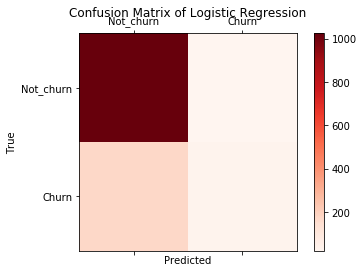

KNeighbors
Accuracy is: 0.842
precision is: 0.643
recall is: 0.087


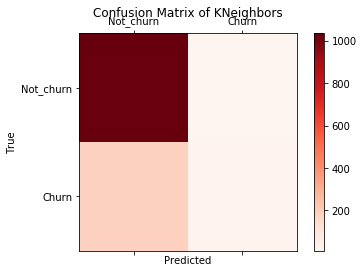

Random Forest
Accuracy is: 0.939
precision is: 0.985
recall is: 0.641


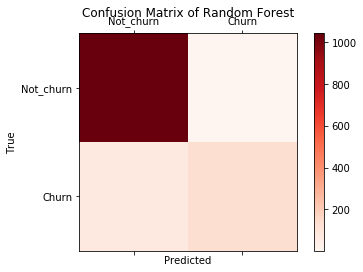

In [41]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrix = [
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(x_test))),
    ("KNeighbors", confusion_matrix(y_test,best_KNN_model.predict(x_test))),
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(x_test))),
]

draw_confusion_matrix(confusion_matrix)

#### Part 3.4.2: Model Evaluation - ROC & AUC

In [42]:
from sklearn.metrics import roc_curve
from sklearn import metrics

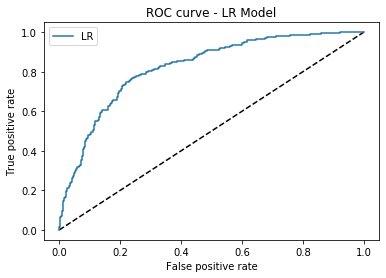

0.8219832235985567

In [43]:
#ROC of LR Model
y_pred_LR = best_LR_model.predict_proba(x_test)[:, 1]
fpr_LR, tpr_LR, _ = roc_curve(y_test, y_pred_LR)

# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_LR, tpr_LR, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

# AUC score
metrics.auc(fpr_LR,tpr_LR)

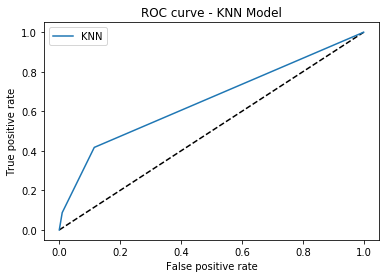

0.6542889558457018

In [44]:
#ROC of KNN Model
y_pred_KNN = best_KNN_model.predict_proba(x_test)[:, 1]
fpr_KNN, tpr_KNN, _ = roc_curve(y_test, y_pred_KNN)

# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_KNN, tpr_KNN, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN Model')
plt.legend(loc='best')
plt.show()

# AUC score
metrics.auc(fpr_KNN,tpr_KNN)

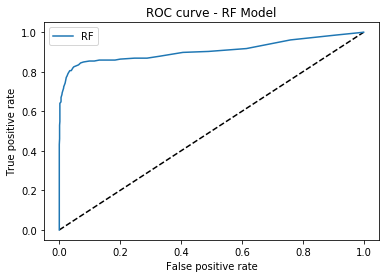

0.9071648439534279

In [45]:
#ROC of RF Model
y_pred_FR = best_RF_model.predict_proba(x_test)[:, 1]
fpr_FR, tpr_FR, _ = roc_curve(y_test, y_pred_FR)

# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_FR, tpr_FR, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF Model')
plt.legend(loc='best')
plt.show()

# AUC score
metrics.auc(fpr_FR,tpr_FR)

## Part 4: Feature Importance

In [46]:
#Random forest(RF) shows the best prediction accuracy. Therefore, the feature importance will be extracted from the RF model. 
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1] 
for f in range(7): 
    print("%d. %s (%f)" % (f + 1, df_new.columns[indices[f]], importances[indices[f]])) 

1. total_day_charge (0.214970)
2. number_customer_service_calls (0.102883)
3. intl_plan (0.078597)
4. total_eve_charge (0.077086)
5. total_intl_charge (0.067857)
6. total_night_minutes (0.053178)
7. total_intl_calls (0.050851)


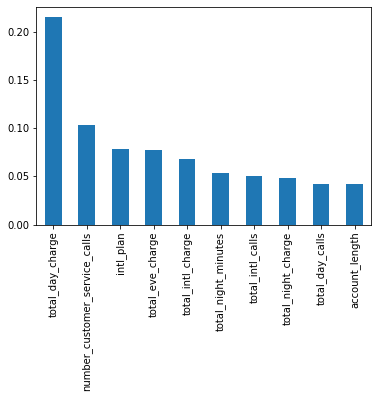

In [47]:
feat_importances = pd.Series(importances, index=df_new.columns[:65])
feat_importances.nlargest(10).plot(kind='bar')